<img src = "https://rec-data.kalibrr.com/www.kalibrr.ph/logos/SSYTB3EN2CEV9HZDWPPE4JHP8X2T7CNC6SDZST8Y-5d0b4f4b.png" width = 600>

# Introduction

## Project Overview
Data ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung.

#### Attribute Information:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

#### Starting from Scratch
Tidak ada template untuk assignment kali ini, jadi kalian harus memulai dari awal. Kamu
dapat membuat file jupyter notebook kamu sendiri dan upload ke github ketika selesai:
1. Download Dataset yang diperlukan di sini <a href="https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data"><b> klik disini</b></a>, lalu save ke folder
/dataset.
2. Buat sebuah Notebook baru, lalu rename file menjadi
“PYTN_KampusMerdeka_fp3_<nama>".
3. Bersihkan dan preproses Dataset kamu.
4. Bangun model menggunakan Logistic Regression, KNN, SVM, Naive Bayes,
Decision Tree, dan Random Forest, atau teknik lainnya.
5. Pilih 1 algoritma yang kamu anggap paling sesuai lalu jelaskan mengapa.
6. Kumpulkan informasi melalui analisis kamu.

**Kelompok - Final Project 3 (Introduction to Python Kampus Merdeka)**<br>

Anggota Kelompok:

1. M. Ihwanul Iqbal<br>
PYTN-KS05-004

2. Muhammad Zhafran Bahij<br>
PYTN-KS05-008

**Latar Belakang**<br>
Penyakit Cardiovascular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit Cardiovascular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit Cardiovascular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

**Data yang digunakan**<br>


#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pickle
# from colorama import Fore, Back, Style
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, mean_squared_error, r2_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# from catboost import CatBoostClassifier
import joblib

from sklearn.ensemble import ExtraTreesClassifier
import plotly.graph_objects as go

from google.colab import drive
from zipfile import ZipFile
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# C. Data Loading

**Mengimport dataset yang akan digunakan**

In [2]:

os.environ['KAGGLE_USERNAME'] = 'gethuk'
os.environ['KAGGLE_KEY'] = '555d1f5b08a6d0397d4384718e7c6467'

In [3]:
! kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 4.08MB/s]


In [4]:
# Ekstrak File berbentuk ZIP


file_name = "/content/heart-failure-clinical-data.zip"

with ZipFile(file_name, 'r') as zip : 
  zip.extractall()
  print('Ekstrak File Berhasil')

Ekstrak File Berhasil


In [5]:

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# D. Data Cleaning

In [7]:
df.shape

(299, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# E. Eksplorasi Data

[0.09757756 0.02424459 0.07564178 0.03106915 0.13184904 0.02510626
 0.0729062  0.1266149  0.08628919 0.0283551  0.02799631 0.2723499 ]


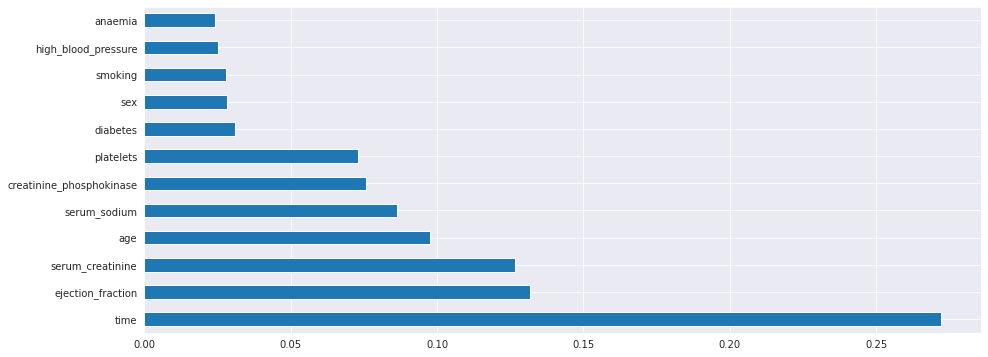

In [11]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [12]:
# Kami hanya akan memilih 3 fitur: time, ejection_fraction, serum_creatine


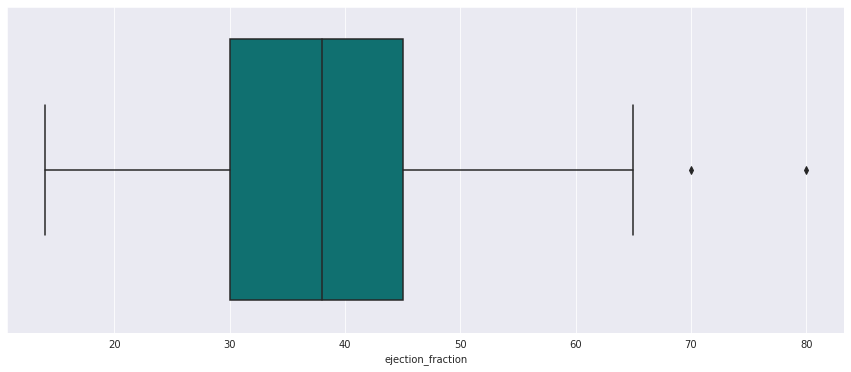

In [13]:
# Boxplot for ejection_fraction

sns.boxplot(x = df.ejection_fraction, color = 'teal')
plt.show()

In [14]:
df[df['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


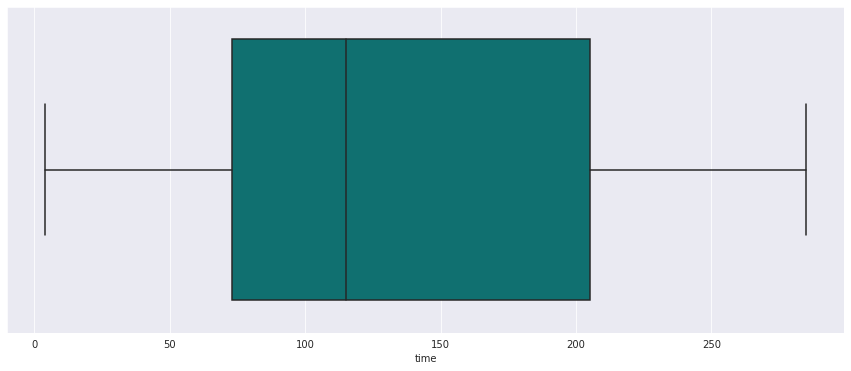

In [15]:
df = df[df['ejection_fraction']<70]
sns.boxplot(x=df.time, color = 'teal')
plt.show()

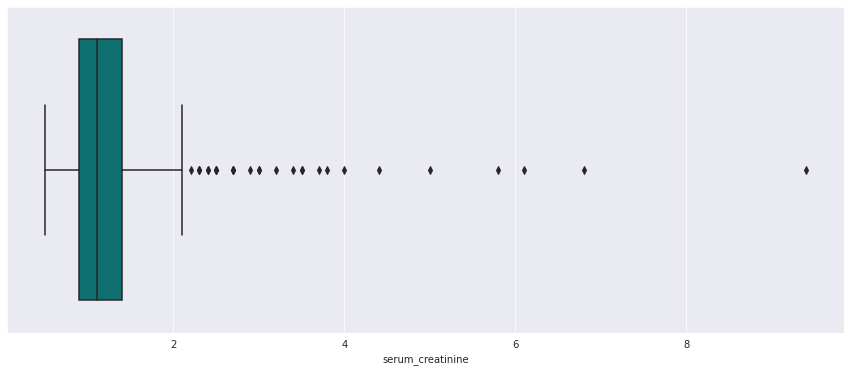

In [16]:
# Boxplot for ejection_fraction
sns.boxplot(x=df.serum_creatinine, color = 'teal')
plt.show()

In [17]:


fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [18]:


d1 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==1)]
d2 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==1)]
d3 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

In [19]:
# Now lets categorize the above histogram by DEATH_EVENT

fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=df.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

# F. Data Preprocessing

Split data menjadi X_train, X_test, Y_train, Y_test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="DEATH_EVENT"), df["DEATH_EVENT"], train_size=0.8, random_state=69)

Tidak ada proses encode dikarenakan data yang di sini sudah berbentuk numerik.

# G. Pendefinisian Model

Dalam projek kali ini, model yang digunakan adalah *random forest*. Secara teknis, random forest adalah ensemble method jika mengacu kepada pendekatan divide and conquer dari decision trees yang dihasilkan pada dataset dan dipisahkan secara terpisah. (Sumber : Kode.id)



Pada projek kali ini, kita akan menggunakan

*   n_estimators = 100
*   max_depth = 50
*   criterion = gini or entropy

Alasan criterion-nya banyak karena nantinya akan diteliti satu persatu yang mana yang terbaik



# H Pelatihan Model

Pelatihan model akan dilakukan sesuai criterion masing-masing dengan nama model : 

*   rf_entropy
*   rf_gini



In [21]:
# Buat modelnya
rf_gini = RandomForestClassifier(max_depth=50, criterion='gini').fit(X_train, y_train)

In [22]:
# Buat model
rf_entropy = RandomForestClassifier(max_depth=50, criterion='entropy').fit(X_train, y_train)

# I Evaluasi Model

Sebelum buat evaluasinya, kita akan buat fungsi intinya agar bisa menerapkan sesuatu yang namanya DRY (Don't Repeat Yourself).

Di sini, kita akan mengevaluasi berdasarkan

*   Accuracy Score
*   Precision Score
*   Recall Score

Accuracy score untuk mengetes akurasi dari model. 

Precision Score adalah skor berapa persen model ini keliru menebak. Misalnya, yang harusnya gambar bebek, model tersebut menebaknya menjadi gambar ayam.

Recall Score adalah skor berapa persen model tersebut menebak dengan tebakan tepat. Penjelasan mudahnya seperti, ada 10 gambar ayam, tetapi model tersebut menganggap hanya ada 8 gambar ayam.


In [23]:
def modeling_function(model, X_test, y_test):
    # Buat hasil prediksi
    predicted = model.predict(X_test)
    print('Data Prediksi : ', predicted)

    # Pengecekan akurasi
    print('')
    data = [
        accuracy_score(y_test, predicted),
        precision_score(y_test, predicted),
        recall_score(y_test, predicted),
        r2_score(y_test, predicted),
        mean_squared_error(y_test, predicted)
    ]

    labels = [
        'Accuration', 'Precision', 'Recall', 'R2 Score', 'Mean Squared Error'
    ]

    for x in range(len(labels)):
        print(labels[x], " : ", data[x])

    print('Confusion Matrix : \n', confusion_matrix(y_test, predicted))

    names = labels
    values = data

    plt.figure(figsize=(9, 3))
    plt.title('Check Some Information About Precision, Accuration, Recall')
    plt.xlabel('Calculation')
    plt.ylabel('Score')
    plt.bar(names, values)
    plt.show()
    
    return data


Data Prediksi :  [0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0]

Accuration  :  0.8666666666666667
Precision  :  0.8888888888888888
Recall  :  0.7272727272727273
R2 Score  :  0.42583732057416257
Mean Squared Error  :  0.13333333333333333
Confusion Matrix : 
 [[36  2]
 [ 6 16]]


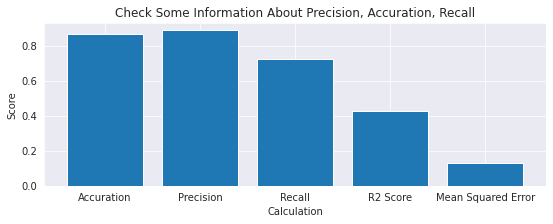

In [24]:
data = modeling_function(rf_gini, X_test, y_test)

Data Prediksi :  [0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1]

Accuration  :  0.8333333333333334
Precision  :  0.8333333333333334
Recall  :  0.6818181818181818
R2 Score  :  0.28229665071770327
Mean Squared Error  :  0.16666666666666666
Confusion Matrix : 
 [[35  3]
 [ 7 15]]


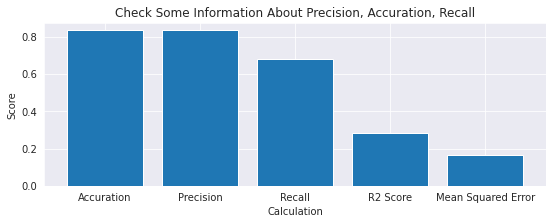

In [25]:
data = modeling_function(rf_entropy, X_test, y_test)

Pada percobaan di atas, kita telah mengetahui bahwa model random forest entropy lebih baik dibandingkan random forest gini, sehingga model yang akan digunakan saat deploying adalah random forest entropy


In [26]:
joblib.dump(rf_entropy, "./random_forest.joblib")

['./random_forest.joblib']

# I. Model Inference

Model yang sudah dilatih, tentunya akan dicoba dengan data berasal dari user web pada link berikut.

# K. Kesimpulan

Kesimpulannya adalah ...

*   Dataset sudah bersih dan hanya berisi angka sehinggat tidak perlu di encode dan dibersihkan.
*   Pada kasus ini, random forest dengan criterion entropy lebih baik dibandingkan criterion gini.

